# Stroke Predicton - Unsupervised

##  Import Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline

## Import Datasets

In [2]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_train_oversampled = pd.read_csv('X_train_oversampled.csv')
y_train_oversampled = pd.read_csv('y_train_oversampled.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

### PCA Projection to 2D - Unbalanced

In [3]:
#PCA
x = X_train.values
y = y_train.values
x = StandardScaler().fit_transform(x)
#pd.DataFrame(data = x, columns = features).head()
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5)
finalDf = pd.concat([principalDf, y_train[['stroke']]], axis = 1)
print(finalDf)
pca.explained_variance_ratio_

      principal component 1  principal component 2  stroke
0                  0.798174              -1.222835       0
1                  1.167129               1.840241       0
2                  2.666007              -1.002239       0
3                 -0.640623              -1.207680       1
4                  4.626267               1.824944       0
...                     ...                    ...     ...
3316              -1.100160              -2.064856       0
3317              -2.135870               1.579229       1
3318              -1.451424               0.673122       0
3319              -0.888103              -1.146172       0
3320              -1.758639              -1.594074       0

[3321 rows x 3 columns]


array([0.19095158, 0.09946646])

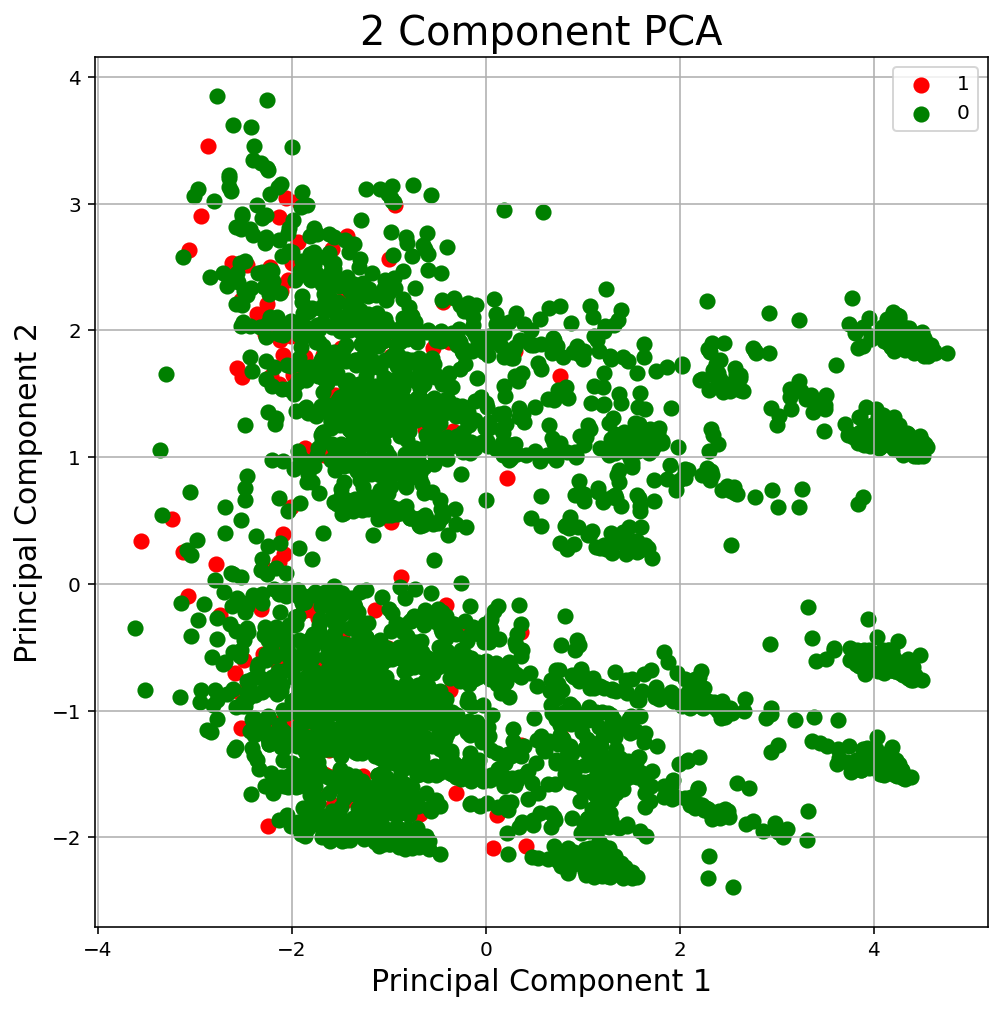

In [4]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['stroke'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### PCA Projection to 2D - Balanced

In [5]:
#PCA
x = X_train_oversampled.values
y = y_train_oversampled.values
x = StandardScaler().fit_transform(x)
#pd.DataFrame(data = x, columns = features).head()
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5)
finalDf = pd.concat([principalDf, y_train_oversampled[['stroke']]], axis = 1)
print(finalDf)
pca.explained_variance_ratio_

      principal component 1  principal component 2  stroke
0                  2.086037               1.545769       0
1                  1.759271              -1.923286       0
2                  4.118601               1.207636       0
3                  5.619393              -2.013428       0
4                  2.164336               1.403126       0
...                     ...                    ...     ...
6327              -0.235630               2.325623       1
6328              -1.624653              -1.466967       1
6329              -1.045852               0.857981       1
6330              -2.647601              -2.051529       1
6331              -0.337533               0.492105       1

[6332 rows x 3 columns]


array([0.171918  , 0.10702621])

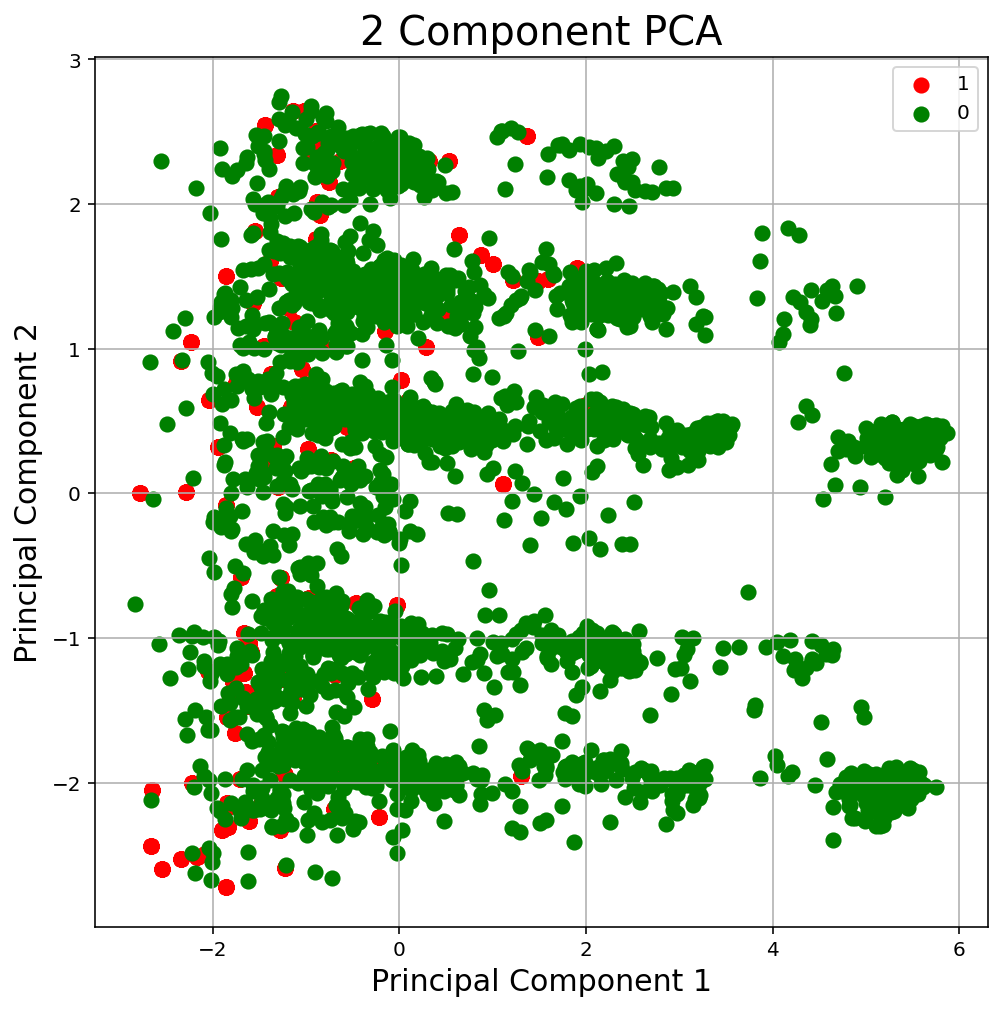

In [6]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['stroke'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# K-Means



In [7]:
print(X_train_oversampled)
print(y_train_oversampled)

       age  hypertension  heart_disease  avg_glucose_level    bmi  \
0     19.0             1              0              65.96  29.00   
1     32.0             0              0             100.65  26.20   
2     14.0             0              0             116.49  30.30   
3      2.0             0              0              65.84  16.10   
4     37.0             0              0              89.11  24.10   
...    ...           ...            ...                ...    ...   
6327  55.0             0              0              92.98  25.60   
6328  78.0             1              0              75.32  28.89   
6329  72.0             1              0              74.63  23.10   
6330  70.0             1              0             242.52  45.50   
6331  38.0             0              0             101.45  28.89   

      gender_Female  gender_Male  gender_Other  ever_married_No  \
0                 1            0             0                1   
1                 0            1     

In [8]:
X_train_oversampled.info()
y_train_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6332 entries, 0 to 6331
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             6332 non-null   float64
 1   hypertension                    6332 non-null   int64  
 2   heart_disease                   6332 non-null   int64  
 3   avg_glucose_level               6332 non-null   float64
 4   bmi                             6332 non-null   float64
 5   gender_Female                   6332 non-null   int64  
 6   gender_Male                     6332 non-null   int64  
 7   gender_Other                    6332 non-null   int64  
 8   ever_married_No                 6332 non-null   int64  
 9   ever_married_Yes                6332 non-null   int64  
 10  work_type_Govt_job              6332 non-null   int64  
 11  work_type_Never_worked          6332 non-null   int64  
 12  work_type_Private               63

In [9]:
features = list(X_train_oversampled.columns)
data = X_train_oversampled[features]

clustering_kmeans = KMeans(n_clusters=2)
data['clusters'] = clustering_kmeans.fit_predict(X_train_oversampled)

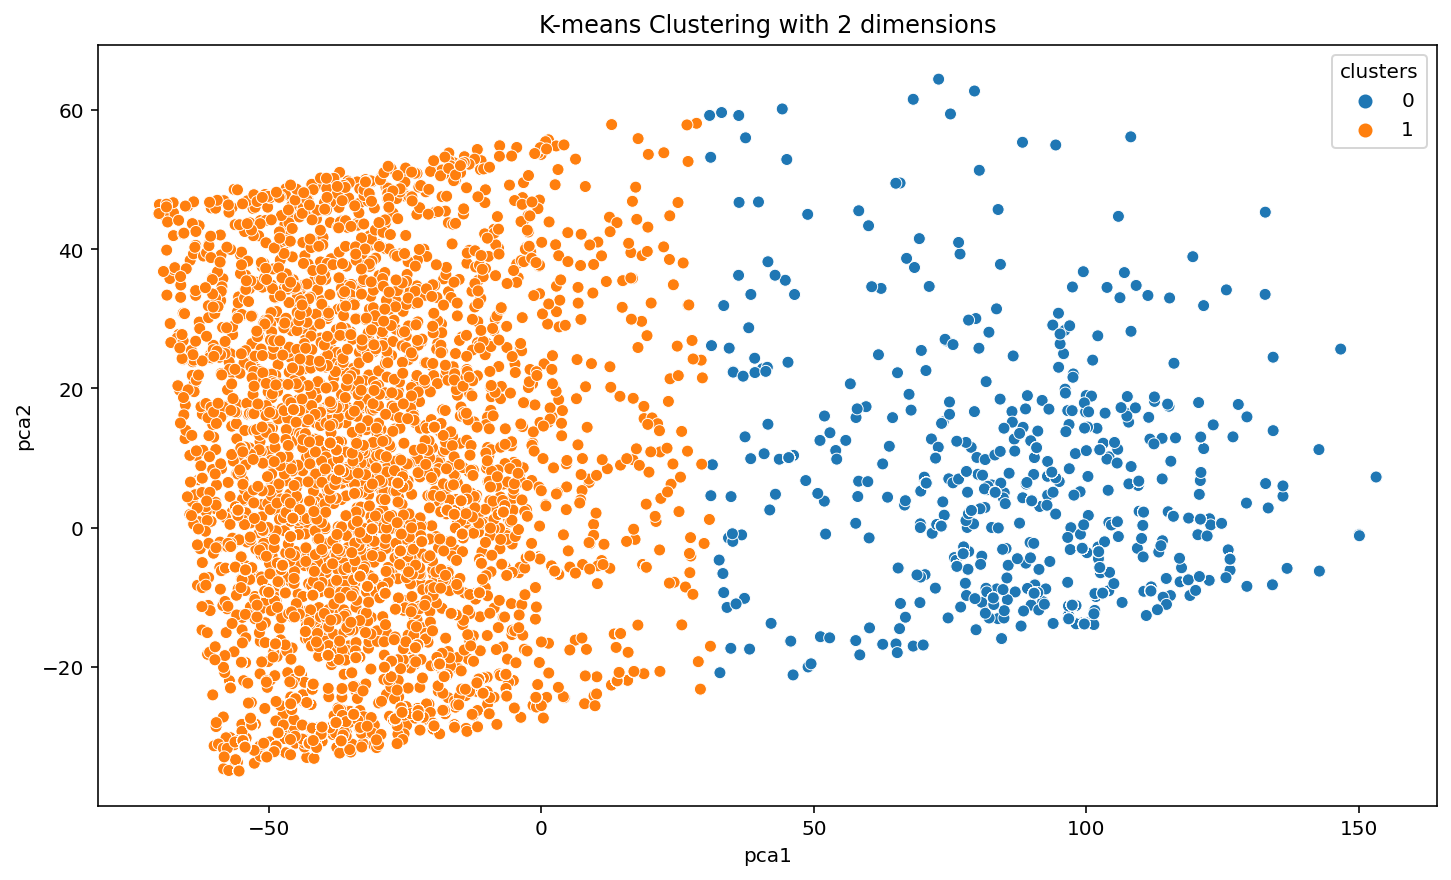

In [10]:
reduced_data = PCA(n_components=2).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [11]:
X = np.array(X_train_oversampled.astype(float))
Y = np.array(y_train_oversampled['stroke'])

In [12]:
kmeans = KMeans(n_clusters=2, max_iter=300, algorithm = 'auto')
kmeans.fit(X)

#300 0.61844
#600 0.38155

KMeans(n_clusters=2)

In [13]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == Y[i]:
        correct += 1

print(correct/len(X))

0.38660770688566015


In [14]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

kmeans.fit(X_scaled)

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == Y[i]:
        correct += 1

print(correct/len(X))

0.5


In [15]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

print(kmeans.labels_)
y_kmeans = kmeans.predict(X)

[0 0 0 ... 0 1 0]


In [16]:
#NEW

In [17]:
X_train_oversampled[:5]

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,19.0,1,0,65.96,29.0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
1,32.0,0,0,100.65,26.2,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,14.0,0,0,116.49,30.3,1,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
3,2.0,0,0,65.84,16.1,0,1,0,1,0,...,0,0,0,1,1,0,1,0,0,0
4,37.0,0,0,89.11,24.1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [18]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_train_oversampled)

In [19]:
scaled_features[:5]

array([[-1.62383855,  2.18572008, -0.39269673, -0.95380504, -0.05222579,
         0.88212936, -0.88184636, -0.01256793,  1.80983136, -1.80983136,
        -0.38435038, -0.03977157,  0.82842317, -0.50975365, -0.275269  ,
         1.04557312, -1.04557312, -0.56129949, -0.54449821,  1.33402821,
        -0.4557472 ],
       [-1.03641172, -0.45751513, -0.39269673, -0.32977464, -0.47467175,
        -1.13362059,  1.13398438, -0.01256793,  1.80983136, -1.80983136,
        -0.38435038, -0.03977157,  0.82842317, -0.50975365, -0.275269  ,
         1.04557312, -1.04557312, -0.56129949,  1.83655334, -0.74960934,
        -0.4557472 ],
       [-1.84977195, -0.45751513, -0.39269673, -0.04483255,  0.14390983,
         0.88212936, -0.88184636, -0.01256793,  1.80983136, -1.80983136,
        -0.38435038, -0.03977157, -1.20711254, -0.50975365,  3.63281013,
         1.04557312, -1.04557312, -0.56129949, -0.54449821,  1.33402821,
        -0.4557472 ],
       [-2.3920121 , -0.45751513, -0.39269673, -0.95596369

In [20]:
kmeans = KMeans(
    init="random",
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [21]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=2, random_state=42)

In [22]:
# The lowest SSE value
kmeans.inertia_

115010.71500634818

In [23]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-1.03074702, -0.15328359, -0.20165925, -0.3859711 , -0.46694216,
         0.06600311, -0.06705222,  0.04131165,  1.80983136, -1.80983136,
        -0.14376065,  0.13073188, -0.23964736, -0.17509075,  0.90482802,
        -0.01167088,  0.01167088,  0.42375686, -0.30590943,  0.06155626,
        -0.21712646],
       [ 0.31357639,  0.04663231,  0.06134927,  0.11742107,  0.14205429,
        -0.02007963,  0.02039879, -0.01256793, -0.55059133,  0.55059133,
         0.04373522, -0.03977157,  0.07290611,  0.05326654, -0.275269  ,
         0.00355054, -0.00355054, -0.12891635,  0.09306452, -0.0187268 ,
         0.06605475]])

In [24]:
# The number of iterations required to converge
kmeans.n_iter_

7

In [25]:
#NEWEST

In [26]:
X_train_oversampled[:5]

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,19.0,1,0,65.96,29.0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
1,32.0,0,0,100.65,26.2,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,14.0,0,0,116.49,30.3,1,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
3,2.0,0,0,65.84,16.1,0,1,0,1,0,...,0,0,0,1,1,0,1,0,0,0
4,37.0,0,0,89.11,24.1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [27]:
temp = np.array(y_train_oversampled)
y_train_oversampled_flatten = temp.flatten()

In [28]:
y_train_oversampled_flatten[:5]

array([0, 0, 0, 0, 0])

In [29]:
label_encoder = LabelEncoder()

In [30]:
true_labels = label_encoder.fit_transform(y_train_oversampled_flatten)

In [31]:
true_labels[:5]

array([0, 0, 0, 0, 0])

In [32]:
label_encoder.classes_

array([0, 1])

In [33]:
n_clusters = len(label_encoder.classes_)

In [34]:
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=2, random_state=42)),
    ]
)

In [35]:
clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters=n_clusters,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           ),
       ),
   ]
)

In [36]:
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

In [37]:
pipe.fit(X_train_oversampled)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=2, n_init=50,
                                         random_state=42))]))])

In [38]:
preprocessed_data = pipe["preprocessor"].transform(X_train_oversampled)

In [39]:
predicted_labels = pipe["clusterer"]["kmeans"].labels_

In [40]:
silhouette_score(preprocessed_data, predicted_labels)

0.5123587156968538

In [41]:
adjusted_rand_score(true_labels, predicted_labels)

0.00031739152613776084

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


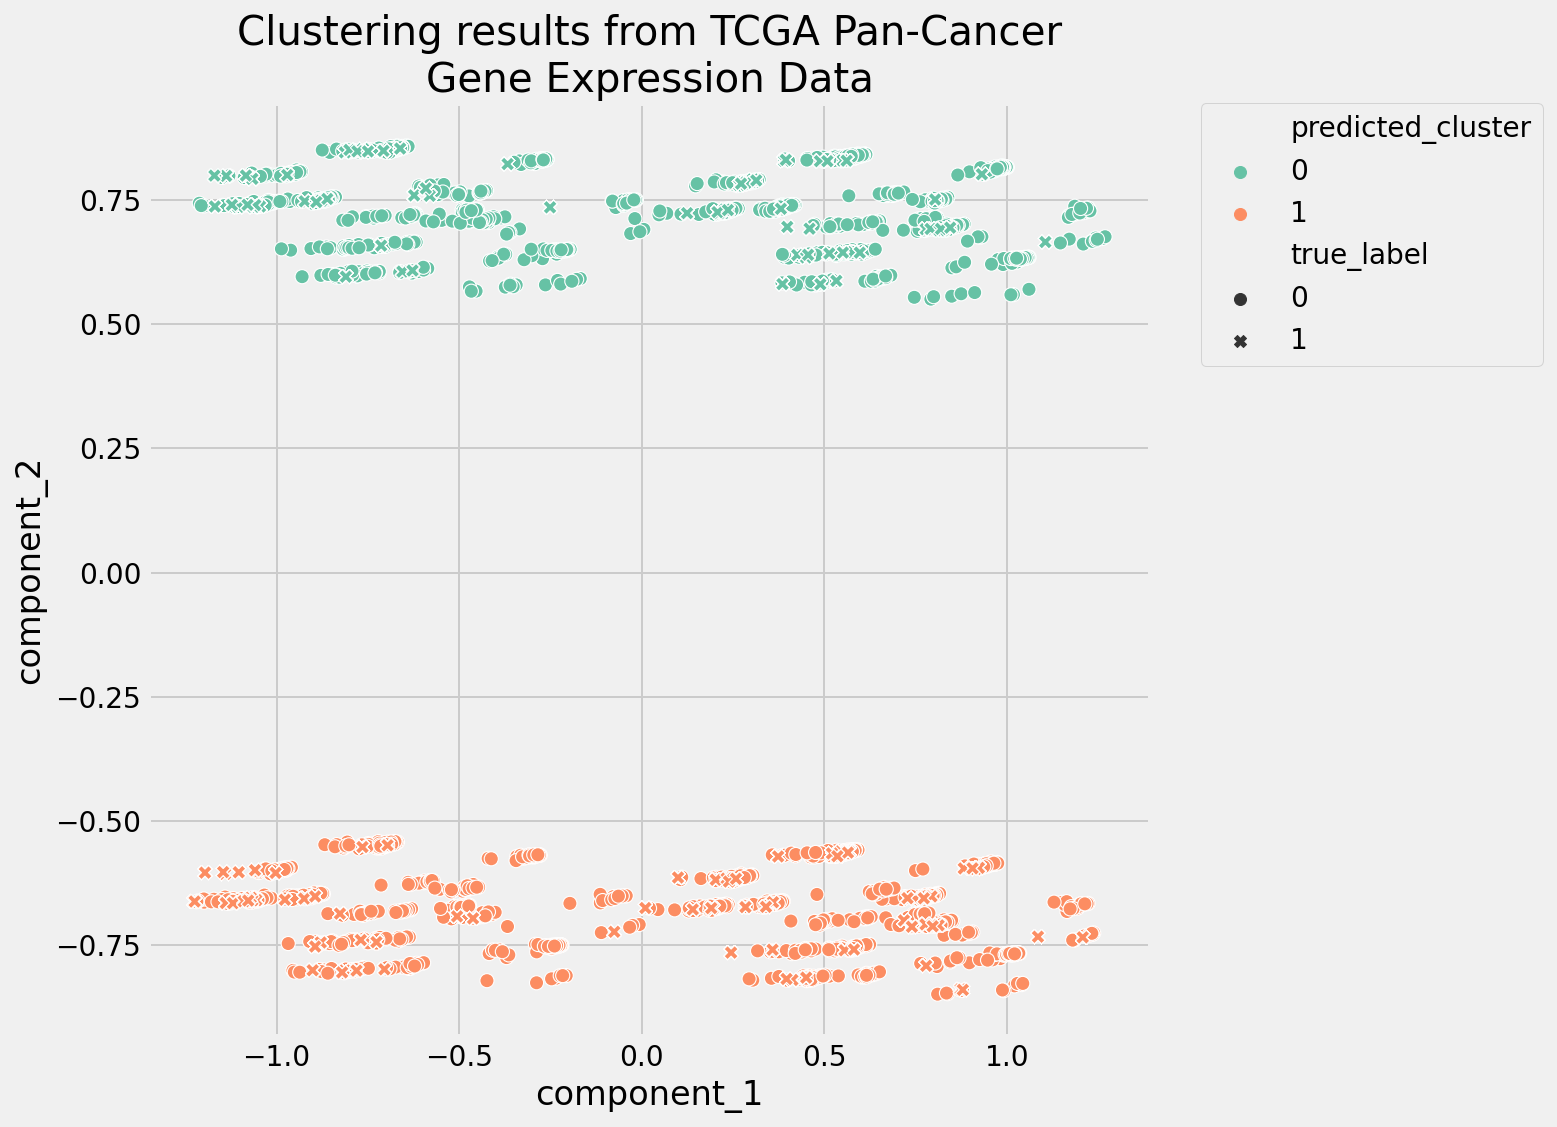

In [42]:
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(X_train_oversampled),
    columns=["component_1", "component_2"],
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    style="true_label",
    palette="Set2",
)

scat.set_title(
    "Clustering results from TCGA Pan-Cancer\nGene Expression Data"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()